In [68]:
import os
from os import walk
import PIL.Image as pil
from PIL import Image  # using pillow-simd for increased speed
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib

In [8]:
def pil_loader_attention(path):
    
    print(path)
    # open path as file to avoid ResourceWarning
    # (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('L')

In [47]:
def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

# To create an kitti image + example of the corresponding attention masks + how to map it so 0.8

../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg
../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg


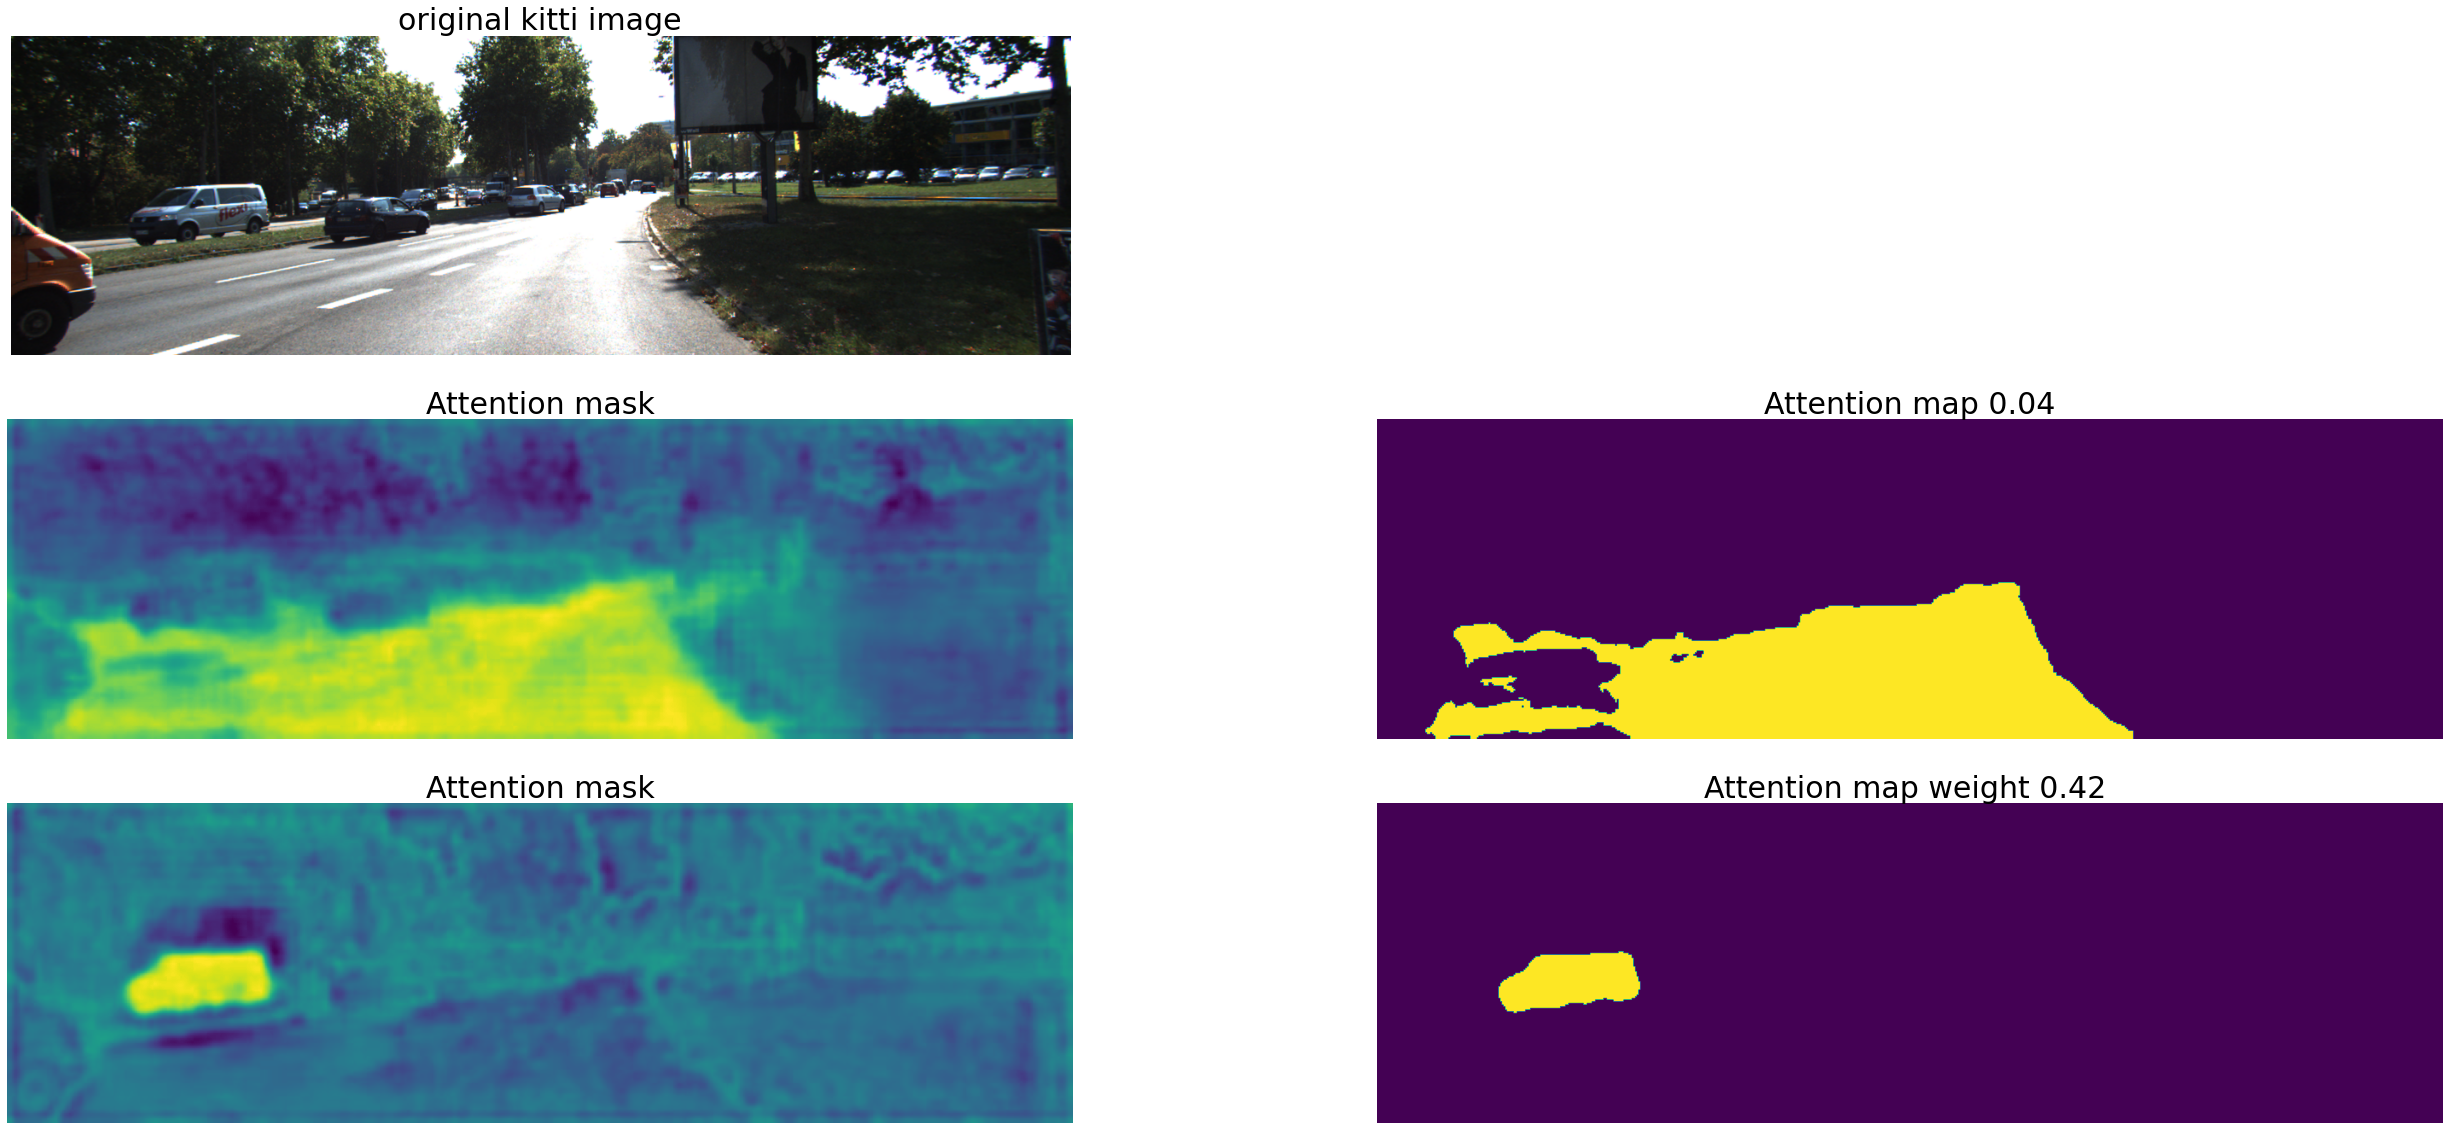

In [88]:

kitti_img = ('../../../kitti/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177.png')

kitti_img = pil_loader(kitti_img)

attention_path_1 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/66_0.172.jpg')
attention_1 = pil_loader_attention(attention_path_1)
attention_1 = transforms.ToTensor()(attention_1).squeeze(0)

attention_path_2 = ('../../../attention_masks_hidde/2011_09_26/2011_09_26_drive_0051_sync/image_02/data/0000000177/55_0.182.jpg')
attention_2 = pil_loader_attention(attention_path_2)
attention_2 = transforms.ToTensor()(attention_2).squeeze(0)


casted_attention_1 = attention_1.clone()
casted_attention_2 = attention_2.clone()

casted_attention_1[casted_attention_1 >= 0.8] = 1
casted_attention_1[casted_attention_1 < 0.8] = 0

casted_attention_2[casted_attention_2 >= 0.8] = 1
casted_attention_2[casted_attention_2 < 0.8] = 0
      
fig, axis = plt.subplots(3, 2, figsize=(45, 20))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

axis[0, 0].title.set_text('original kitti image')
axis[0, 0].axis('off')
axis[0, 0 ].imshow(kitti_img)

axis[1, 0].title.set_text('Attention mask')
axis[1, 0].axis('off')
axis[1, 0 ].imshow(attention_1)



fig.delaxes(axis[0, 1])

axis[2, 0].title.set_text('Attention mask')
axis[2, 0].axis('off')
axis[2, 0 ].imshow(attention_2)

w = casted_attention_1.sum().item()/950
w = 1 / w

axis[1, 1].title.set_text(f'Attention map {round(w, 2)}')
axis[1, 1].axis('off')
axis[1, 1 ].imshow(casted_attention_1)

w = casted_attention_2.sum().item()/950
w = 1 / w
axis[2, 1].title.set_text(f'Attention map weight {round(w, 2)} ')
axis[2, 1].axis('off')
axis[2, 1].imshow(casted_attention_2)




In [ ]:

# for (dirpath, dirnames, filenames) in walk(path):

#     for file in filenames:
# #         print(file)
#         new_path = path + file

#         img = pil_loader_attention(new_path)
#         img = transforms.ToTensor()(img).squeeze(0)

#         plt.figure(figsize = (10,20))
#         plt.imshow(img, cmap = 'cividis')
#         plt.tight_layout()
#         plt.axis('off')
#         plt.show()
